# 문제 1
- 두 배열의 합
- https://www.acmicpc.net/problem/2143

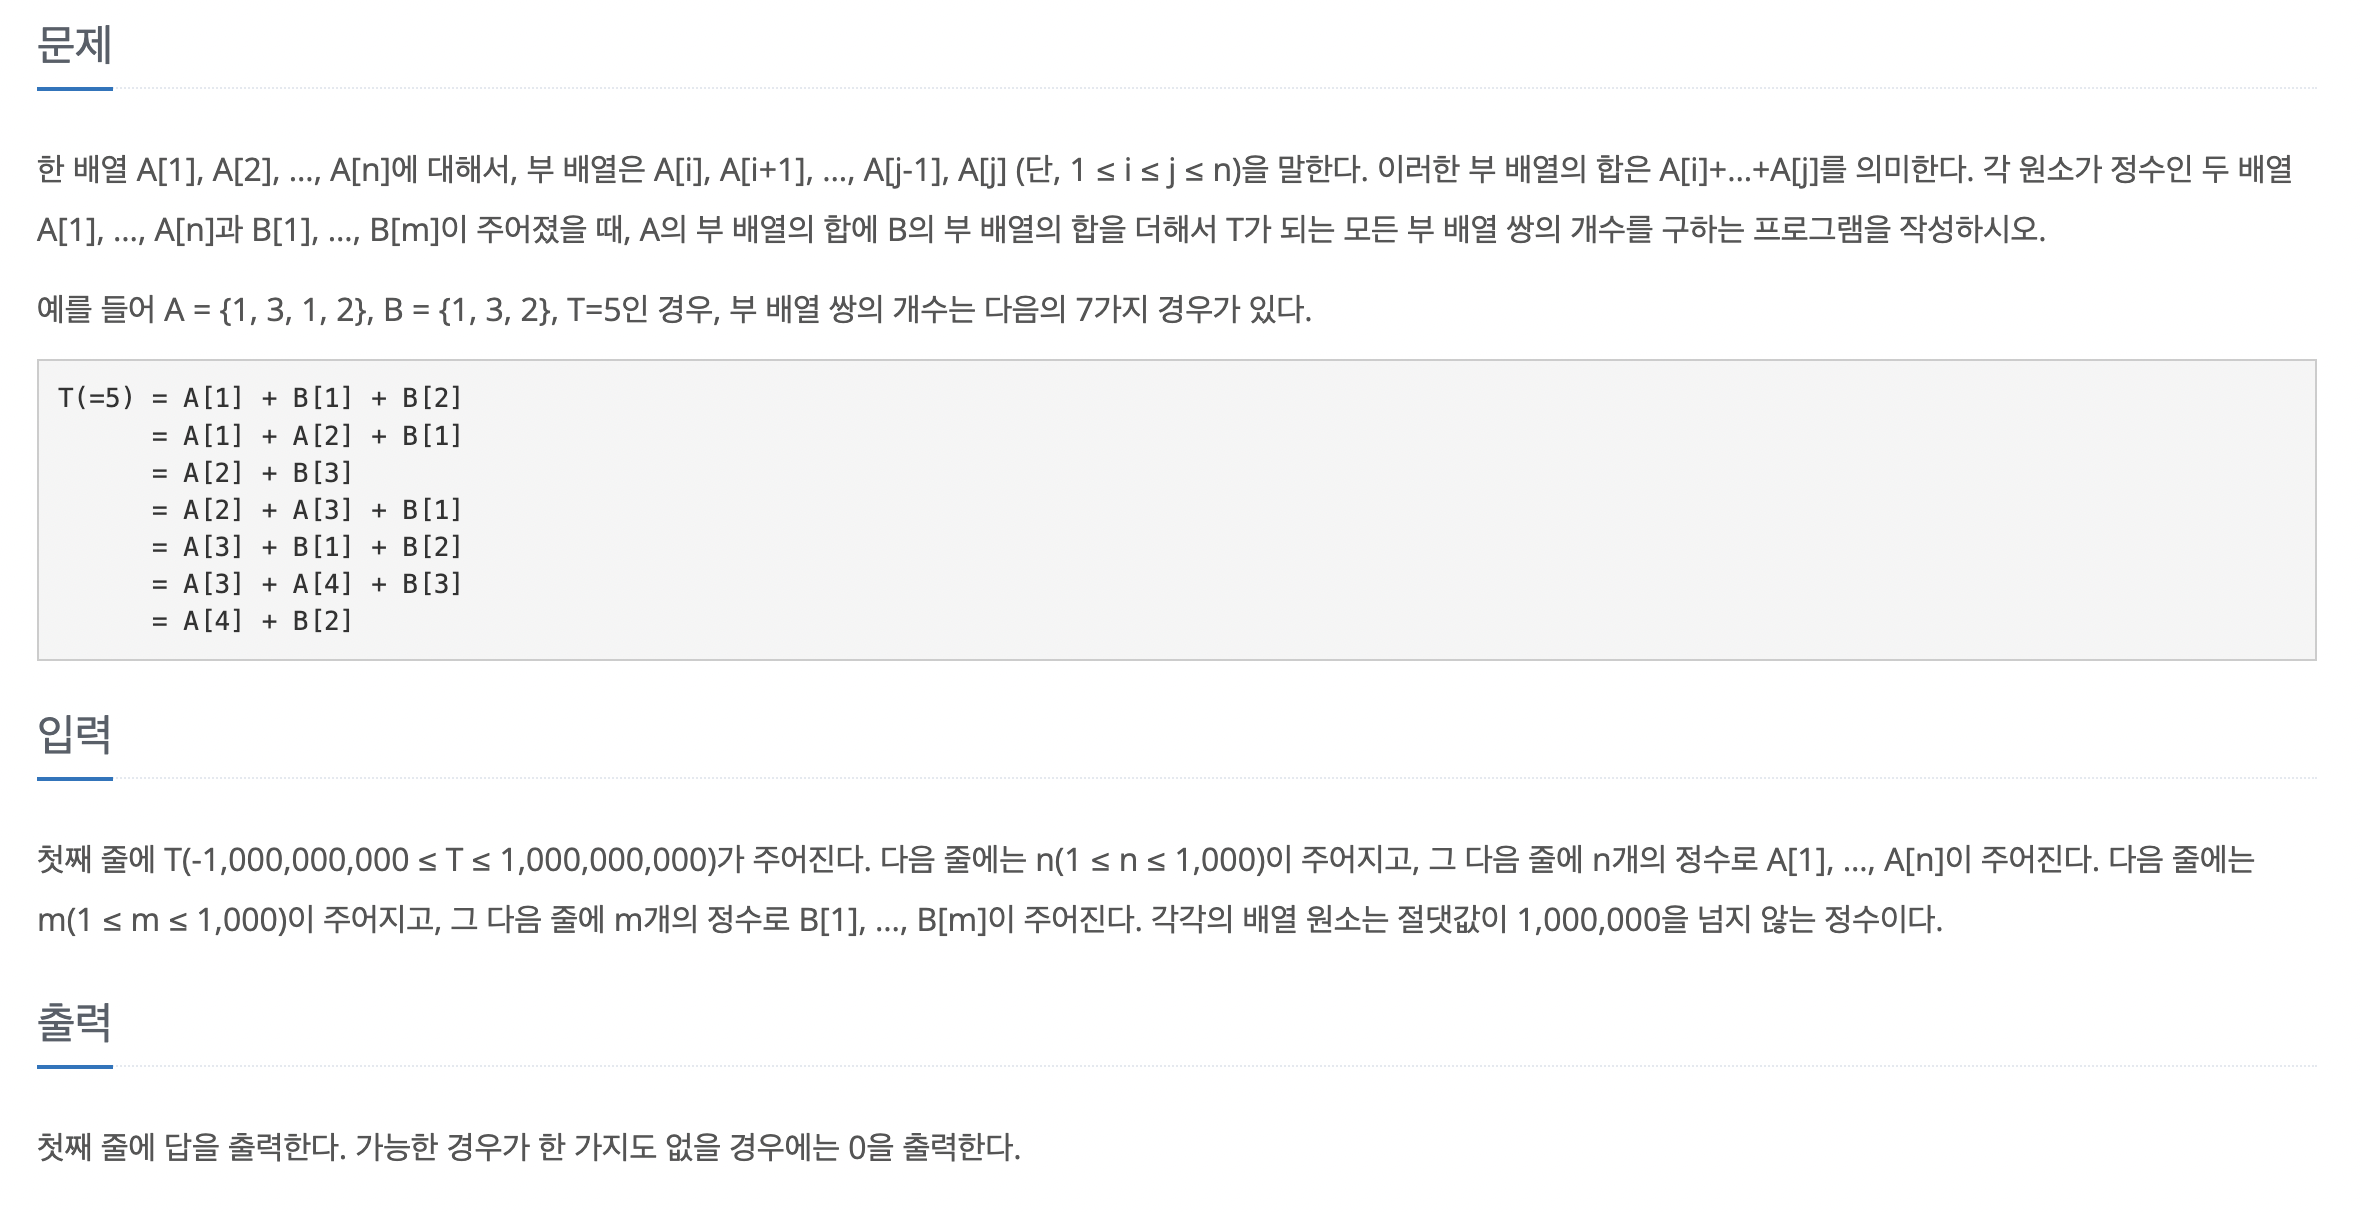
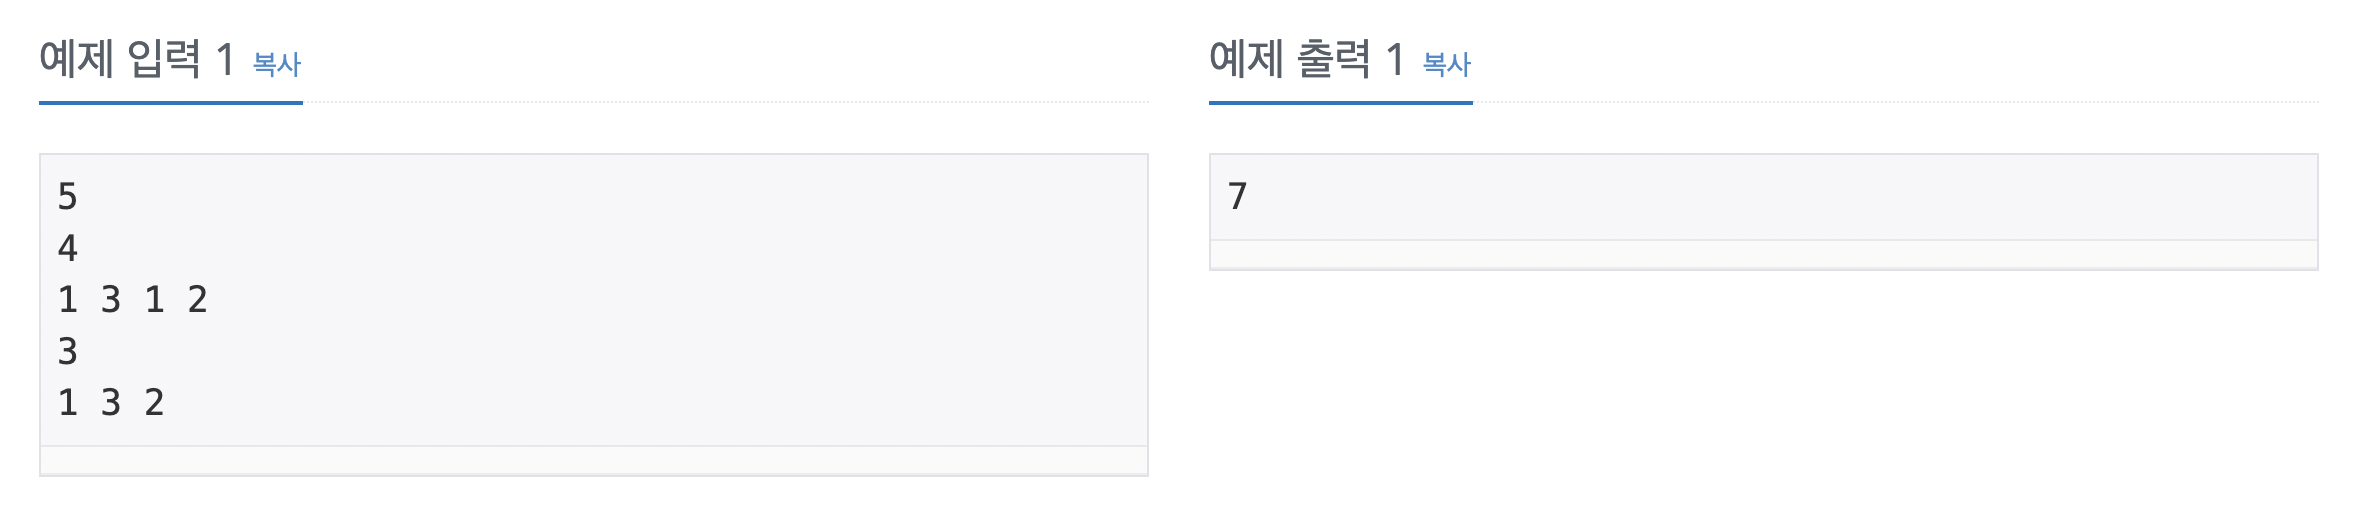

![](2022-10-23-18-56-53.png)
![](2022-10-23-18-57-11.png)

In [4]:
from collections import defaultdict
import sys
# input = sys.stdin.readline

T = int(input())
n_a = int(input())
A = list(map(int, input().split()))
n_b = int(input())
B = list(map(int, input().split()))

dict_a = defaultdict(int)
for i in range(n_a):
    for j in range(i, n_a):
        dict_a[sum(A[i:j+1])] += 1

answer = 0
for i in range(n_b):
    for j in range(i, n_b):
        answer += dict_a[T-sum(B[i:j+1])]

print(answer)

5
4
1 3 1 2
3
1 3 2
7


- 이분 탐색 풀이 법
- 출처: https://imksh.com/78 [강승현입니다:티스토리]

In [5]:
import bisect
import sys
# input = sys.stdin.readline
T = int(input())
n_a = int(input())
A = list(map(int,input().split()))
n_b = int(input())
B = list(map(int,input().split()))
A_csum = []
B_csum = []
for i in range(n_a):
    for j in range(i, n_a):
        A_csum.append(sum(A[i:j+1]))

for i in range(n_b):
    for j in range(i, n_b):
        B_csum.append(sum(B[i:j+1]))

A_csum.sort()
B_csum.sort()

answer = 0
for i in range(len(A_csum)):
    l = bisect.bisect_left(B_csum,T-A_csum[i])
    r = bisect.bisect_right(B_csum,T-A_csum[i])
    answer+=r-l
print(answer)

5
4
1 3 1 2
3
1 3 2
7


# 문제 2
- 배열에서 이동
- https://www.acmicpc.net/problem/1981

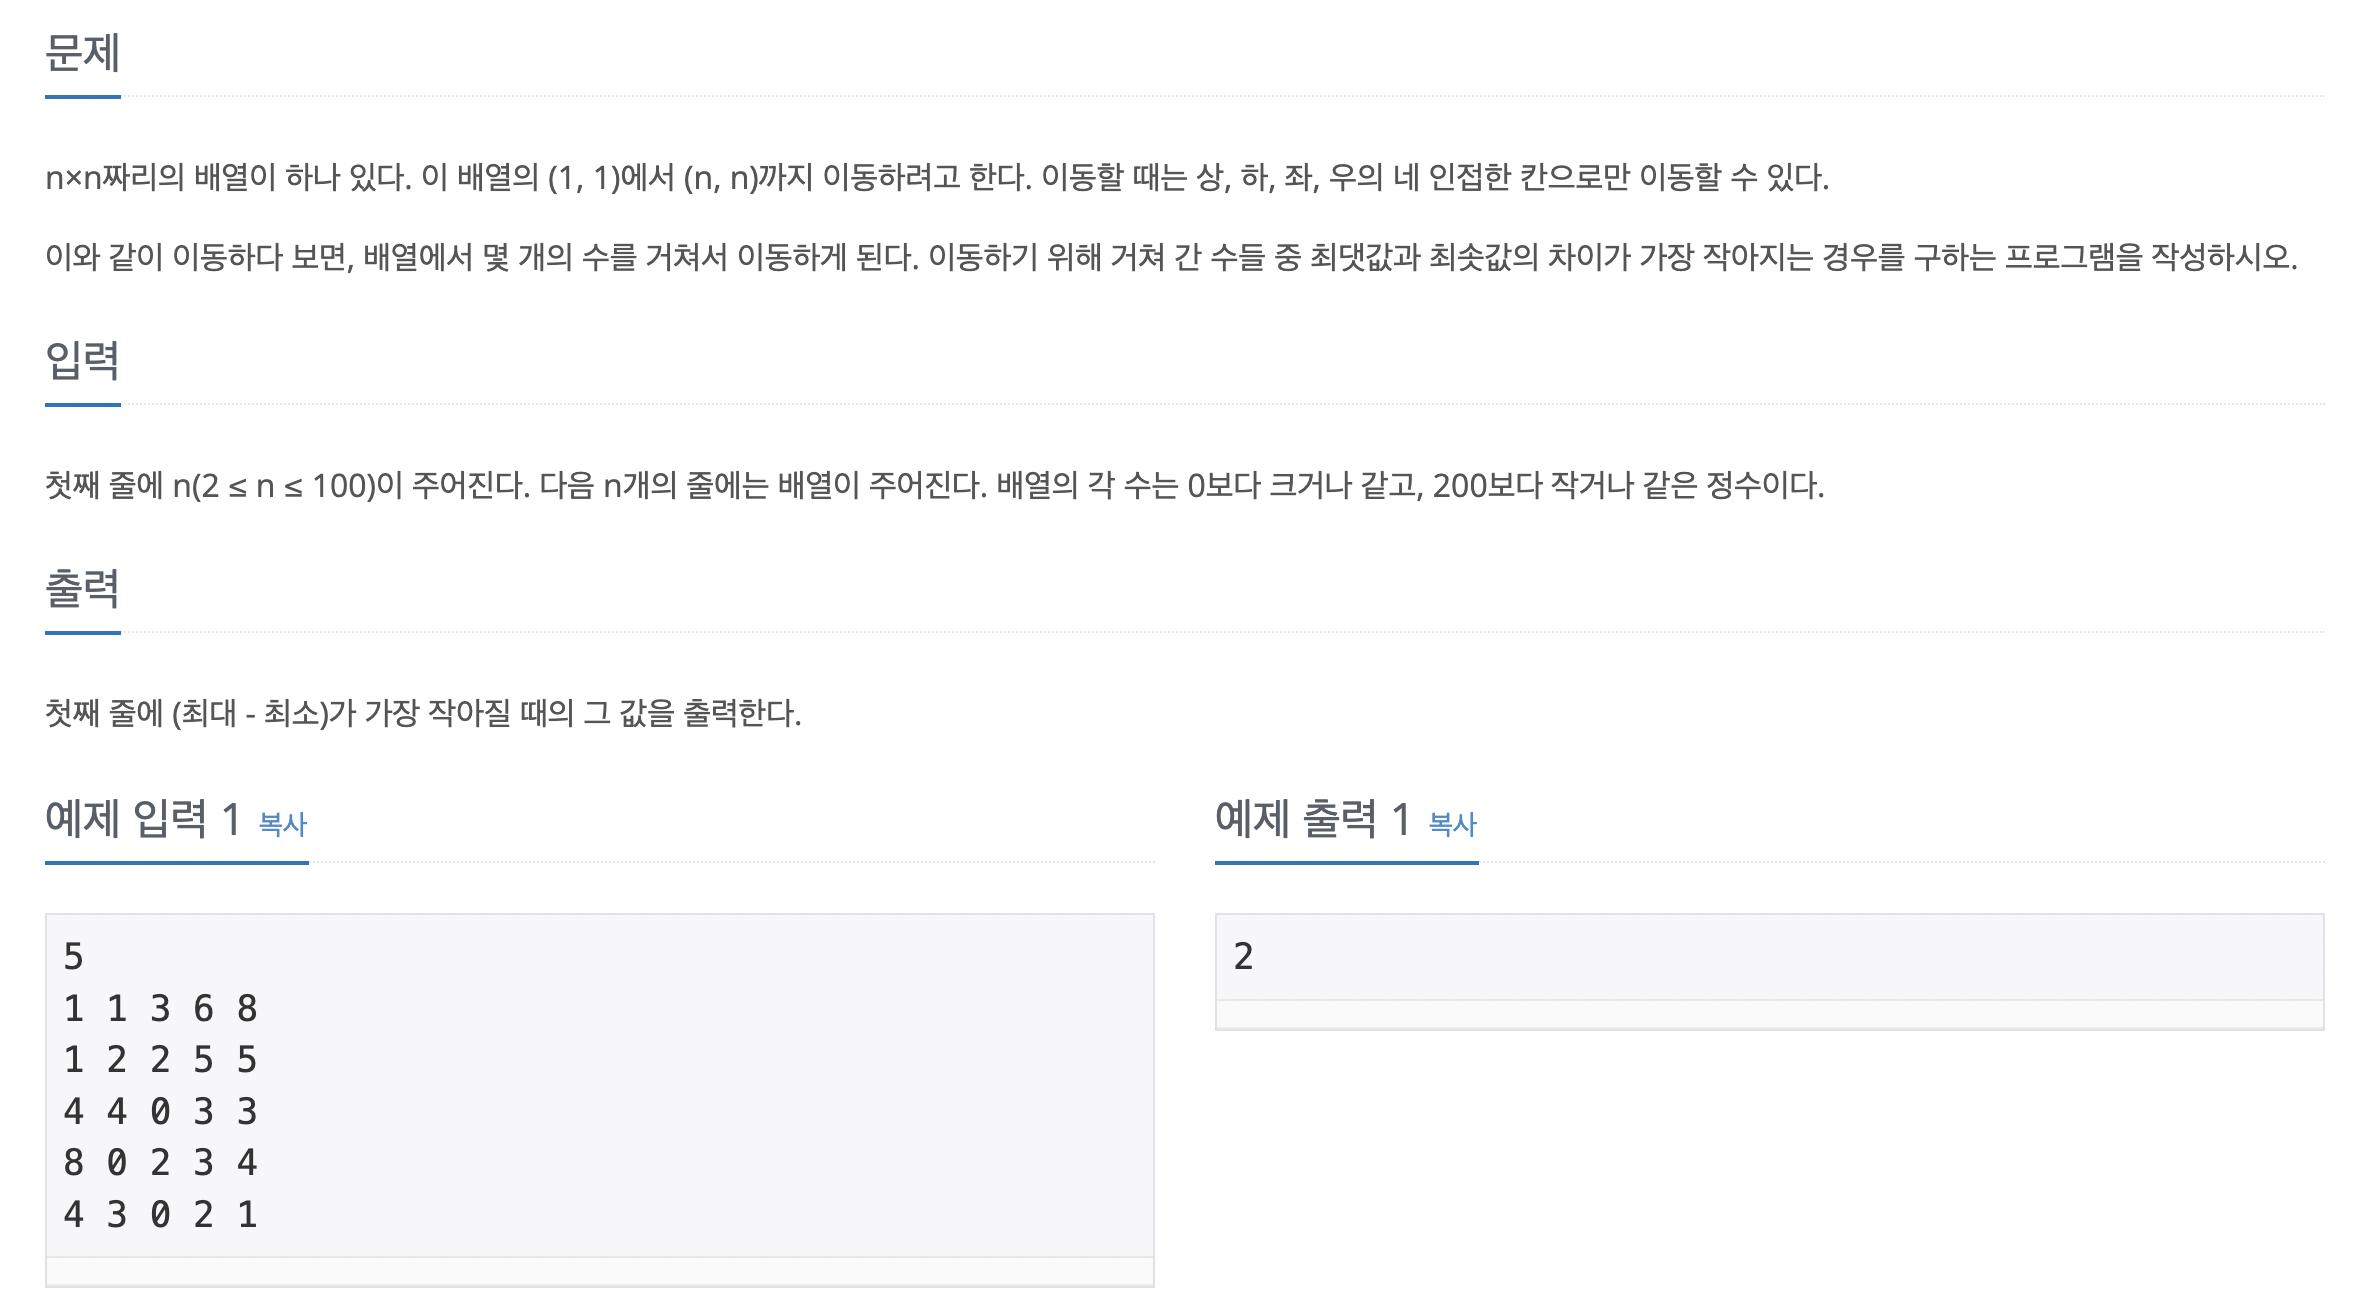

- 참고 풀이
- https://chldkato.tistory.com/67

In [13]:
import sys
from collections import deque
# input = sys.stdin.readline

n = int(input())
board = [list(map(int,input().split())) for _ in range(n)]

global_max = max(map(max,board))
global_min = min(map(min,board))
s_x,s_y = 0,0
e_x,e_y = n-1,n-1
dx = [-1,0,1,0]
dy = [0,1,0,-1]
def bfs():
    q = deque()
    q.append((s_x,s_y))
    visited = [[False]*n for _ in range(n)]
    visited[s_x][s_y] = True
    while q:
        x,y = q.popleft()
        visited[x][y] = True
        if x == e_x and y == e_y:
            return True
        for i in range(4):
            nx = x+dx[i]
            ny = y+dy[i]
            if 0<=nx<n and 0<=ny<n and visited[nx][ny] == False:
                if left <= board[nx][ny] <= right:
                    q.append((nx,ny))
                    visited[nx][ny] = True       
    else:
        return False

l_max = min(board[s_x][s_y], board[e_x][e_y])
l_min = global_min
r_max = global_max
r_min = max(board[s_x][s_y], board[e_x][e_y])
left, right = l_min, r_min

answer = sys.maxsize
while l_min<=left<=l_max and r_min<=right<=r_max:
    l_flag, r_flag = 0,0
    if bfs():
        answer = min(answer, right-left)
        left += 1
        l_flag = 1
    else:
        if l_flag and r_flag:
            left += 1
            right += 1
        else:
            right += 1
            r_flag = 1

print(answer)

5
1 1 3 6 8
1 2 2 5 5
4 4 0 3 3
8 0 2 3 4
4 3 0 2 1
2
